# XGBoost

In [1]:
import pandas as pd
from tsm.evaluators import k_fold_validator
from sklearn.metrics import mean_squared_error
from math import sqrt
import pickle
import xgboost as xgb

In [2]:
import matplotlib.pyplot as plt

In [3]:
SEED = 42
ROUNDS = 10000
EARLY_STOP = 10

In [4]:
METER = 2

### Prepare Data

In [5]:
data = pd.read_pickle('data/prep/train_meter_{}.pkl'.format(METER))

In [6]:
exclude = ['timestamp', 'day_suspicious', 'month_suspicious']
y_col = ['log_meter_reading']
x_cols = [x for x in list(data) if x not in exclude + y_col]

In [7]:
if METER == 0:
    data = data[data.day_suspicious == False].reset_index(drop=True)
else:
    data = data[(data.day_suspicious == False) | ((data.day_suspicious == True) & (data.month_suspicious == True))].reset_index(drop=True)

### Model Training

In [8]:
%%time
for tr_idx, ts_idx in k_fold_validator(k=8, data=data.index.values, shuffle=True, random_state=42):
    
    x = data[x_cols].values
    y = data[y_col].values
    x_tr, x_ts, y_tr, y_ts = x[tr_idx], x[ts_idx], y[tr_idx], y[ts_idx]
    
    dtrain = xgb.DMatrix(x_tr, label=y_tr)
    dtest = xgb.DMatrix(x_ts, label=y_ts)
    num_round = ROUNDS
    param = {}
    param = {'max_depth': 15, 'eta': 0.05, 'objective': 'reg:squarederror', 'eval_metric': 'rmse'}
    #param['gpu_id'] = 0
    #param['tree_method'] = 'gpu_hist'
    bst = xgb.train(param, dtrain, ROUNDS, evals=[(dtest, 'eval')], early_stopping_rounds=EARLY_STOP)
    break

[0]	eval-rmse:5.50077
Will train until eval-rmse hasn't improved in 50 rounds.
[1]	eval-rmse:5.22852
[2]	eval-rmse:4.96989
[3]	eval-rmse:4.72438
[4]	eval-rmse:4.49132
[5]	eval-rmse:4.27013
[6]	eval-rmse:4.05987
[7]	eval-rmse:3.86020
[8]	eval-rmse:3.67058
[9]	eval-rmse:3.49064
[10]	eval-rmse:3.31957
[11]	eval-rmse:3.15735
[12]	eval-rmse:3.00330
[13]	eval-rmse:2.85682
[14]	eval-rmse:2.71812
[15]	eval-rmse:2.58644
[16]	eval-rmse:2.46164
[17]	eval-rmse:2.34313
[18]	eval-rmse:2.23054
[19]	eval-rmse:2.12397
[20]	eval-rmse:2.02273
[21]	eval-rmse:1.92691
[22]	eval-rmse:1.83553
[23]	eval-rmse:1.74934
[24]	eval-rmse:1.66769
[25]	eval-rmse:1.59014
[26]	eval-rmse:1.51674
[27]	eval-rmse:1.44716
[28]	eval-rmse:1.38147
[29]	eval-rmse:1.31866
[30]	eval-rmse:1.25964
[31]	eval-rmse:1.20336
[32]	eval-rmse:1.14959
[33]	eval-rmse:1.09837
[34]	eval-rmse:1.04995
[35]	eval-rmse:1.00522
[36]	eval-rmse:0.96186
[37]	eval-rmse:0.92098
[38]	eval-rmse:0.88245
[39]	eval-rmse:0.84609
[40]	eval-rmse:0.81190
[41]	eval-

[344]	eval-rmse:0.27843
[345]	eval-rmse:0.27840
[346]	eval-rmse:0.27840
[347]	eval-rmse:0.27840
[348]	eval-rmse:0.27839
[349]	eval-rmse:0.27838
[350]	eval-rmse:0.27836
[351]	eval-rmse:0.27836
[352]	eval-rmse:0.27835
[353]	eval-rmse:0.27835
[354]	eval-rmse:0.27831
[355]	eval-rmse:0.27826
[356]	eval-rmse:0.27826
[357]	eval-rmse:0.27826
[358]	eval-rmse:0.27824
[359]	eval-rmse:0.27823
[360]	eval-rmse:0.27822
[361]	eval-rmse:0.27820
[362]	eval-rmse:0.27820
[363]	eval-rmse:0.27819
[364]	eval-rmse:0.27819
[365]	eval-rmse:0.27819
[366]	eval-rmse:0.27817
[367]	eval-rmse:0.27816
[368]	eval-rmse:0.27815
[369]	eval-rmse:0.27814
[370]	eval-rmse:0.27814
[371]	eval-rmse:0.27811
[372]	eval-rmse:0.27810
[373]	eval-rmse:0.27810
[374]	eval-rmse:0.27809
[375]	eval-rmse:0.27808
[376]	eval-rmse:0.27808
[377]	eval-rmse:0.27807
[378]	eval-rmse:0.27806
[379]	eval-rmse:0.27805
[380]	eval-rmse:0.27801
[381]	eval-rmse:0.27799
[382]	eval-rmse:0.27799
[383]	eval-rmse:0.27798
[384]	eval-rmse:0.27798
[385]	eval-rmse:

[686]	eval-rmse:0.27446
[687]	eval-rmse:0.27446
[688]	eval-rmse:0.27446
[689]	eval-rmse:0.27446
[690]	eval-rmse:0.27444
[691]	eval-rmse:0.27443
[692]	eval-rmse:0.27444
[693]	eval-rmse:0.27442
[694]	eval-rmse:0.27442
[695]	eval-rmse:0.27442
[696]	eval-rmse:0.27441
[697]	eval-rmse:0.27441
[698]	eval-rmse:0.27440
[699]	eval-rmse:0.27440
[700]	eval-rmse:0.27440
[701]	eval-rmse:0.27440
[702]	eval-rmse:0.27440
[703]	eval-rmse:0.27440
[704]	eval-rmse:0.27440
[705]	eval-rmse:0.27439
[706]	eval-rmse:0.27437
[707]	eval-rmse:0.27438
[708]	eval-rmse:0.27437
[709]	eval-rmse:0.27437
[710]	eval-rmse:0.27435
[711]	eval-rmse:0.27435
[712]	eval-rmse:0.27436
[713]	eval-rmse:0.27435
[714]	eval-rmse:0.27436
[715]	eval-rmse:0.27435
[716]	eval-rmse:0.27435
[717]	eval-rmse:0.27435
[718]	eval-rmse:0.27434
[719]	eval-rmse:0.27434
[720]	eval-rmse:0.27433
[721]	eval-rmse:0.27433
[722]	eval-rmse:0.27433
[723]	eval-rmse:0.27433
[724]	eval-rmse:0.27433
[725]	eval-rmse:0.27433
[726]	eval-rmse:0.27433
[727]	eval-rmse:

### Saving Model

In [9]:
rmsle = 0.27395
bst.save_model('data/models/met{}_xgb_rmsle_{}.pkl'.format(METER, round(rmsle, 3)))

### Error Analysis

In [11]:
%%time
data['y_hat'] = bst.predict(xgb.DMatrix(data[x_cols].values), ntree_limit=bst.best_ntree_limit)

CPU times: user 24min 22s, sys: 7.1 s, total: 24min 29s
Wall time: 3min 14s


In [12]:
data['errors'] = abs(data.log_meter_reading - data.y_hat)

In [14]:
data.groupby('building_id')['errors'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
building_id,,,,,,,,
762,7560.0,0.017041,0.045016,5.960464e-07,0.004178,0.009243,0.018027,1.586962
751,8696.0,0.018112,0.025161,3.337860e-06,0.005311,0.011911,0.022968,1.102042
772,8678.0,0.019945,0.023825,4.053116e-06,0.006033,0.013507,0.025484,0.694877
764,8752.0,0.021097,0.025457,9.536743e-07,0.006348,0.014488,0.026836,0.528272
784,8567.0,0.021278,0.021282,1.907349e-06,0.007611,0.016603,0.029337,0.534963
...,...,...,...,...,...,...,...,...
949,8206.0,0.287732,0.213088,1.835823e-04,0.117954,0.251075,0.411439,1.789346
1306,4433.0,0.290755,0.335426,2.622604e-05,0.077342,0.192965,0.393822,4.851798
1239,960.0,0.318877,0.337008,4.959106e-05,0.103745,0.244888,0.434939,4.603982


In [34]:
BID = 878
bid_data = data[data.building_id == BID].reset_index(drop=True)

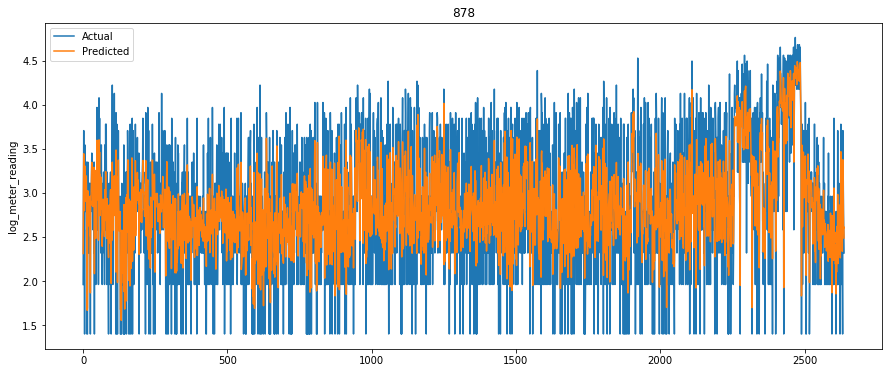

In [35]:
plt.figure(figsize=(15,6))
plt.title(BID)
plt.ylabel('log_meter_reading')
plt.plot(bid_data.log_meter_reading, label='Actual')
plt.plot(bid_data.y_hat, label='Predicted')
plt.legend()
plt.show()

In [36]:
original_data = pd.read_pickle('data/prep/train_meter_{}.pkl'.format(METER))

In [39]:
or_bid_data = original_data[original_data.building_id == BID].reset_index(drop=True)

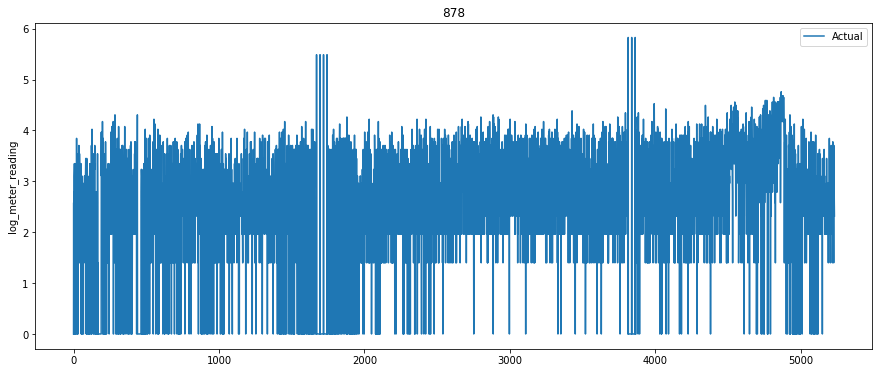

In [41]:
plt.figure(figsize=(15,6))
plt.title(BID)
plt.ylabel('log_meter_reading')
plt.plot(or_bid_data.log_meter_reading, label='Actual')
plt.legend()
plt.show()